In [1]:
########### IMPORT ###########
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()


Node 974350b8-c62b-4cd5-aab2-1fa81fa4e35f

In [2]:
from init import init
from run import run
from idle import idle

import numpy as np
import math

import cv2
from cv2 import aruco
import numpy as np
from matplotlib import pyplot as plt
import time

from init import init
#fonction Sophie
#from findPath import findPath

#fonction Liandro
from camera import live_cam

# State Machine Explanation

* IDLE -> INIT: Press on the middle button of the robot
* INIT -> RUN: Automatic when init is done
* INIT -> IDLE: Automatic if Camera is not detected
* RUN -> IDLE: Automatic when the goal is reach

In [3]:
########### MAIN ###########
async def main():
    x_init, expanded_obs, trajectory_points, cam, corner_coordinates = init()
    if x_init is not None and np.any(x_init):
        await run(x_init, expanded_obs, trajectory_points, cam, corner_coordinates,node,client)
    else:
        print("ERROR: CAMERA IS NOT DETECTED")
    idle()

# CODE

corner_coordinates OK :  [[161, 27], [568, 40], [634, 433], [97, 420]]
position goal OK:  [128, 191]
------------------- 624.0 848.0 545.0 768.0
pos_goal :  [128, 191]
pos_obstacle :  [[[179, 546], [138, 549], [123, 659], [203, 655]], [[363, 364], [363, 445], [432, 444], [470, 406], [432, 364]], [[619, 138], [626, 198], [726, 204], [719, 144]], [[240, 116], [241, 157], [405, 160], [403, 119]]]
pos_thymio :  [736, 656, -92.73]
Schematic map :


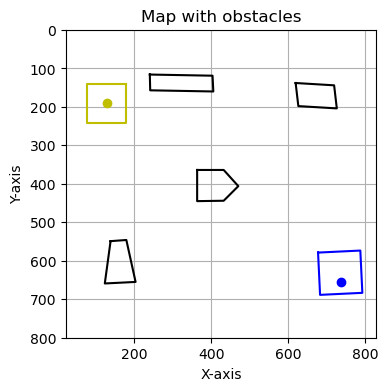

Schematic map with expanded obstacles :


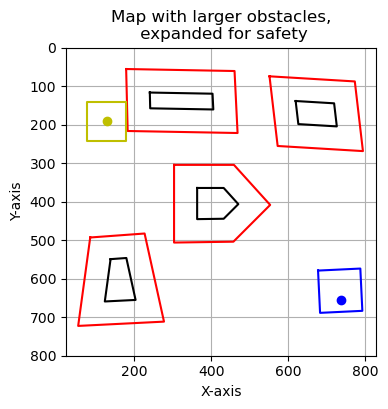

Visible vertices from each node :
0 [3, 4, 6, 7, 8, 11, 12, 16, 17]
1 [4, 2, 5, 14, 15, 18]
2 [1, 3]
3 [0, 2, 4, 5, 6, 7, 8, 12, 15]
4 [0, 3, 1, 5, 6, 15, 18]
5 [1, 3, 4, 9, 6, 11, 12, 15, 16, 18]
6 [0, 3, 4, 5, 7, 15, 18]
7 [0, 3, 6, 8, 12]
8 [0, 3, 7, 9, 10, 11, 12, 16, 17]
9 [8, 5, 10, 11, 12, 15, 16]
10 [8, 9, 13, 11, 16, 17]
11 [0, 5, 8, 9, 10, 12, 15, 16, 17]
12 [0, 3, 5, 7, 8, 9, 11, 13]
13 [12, 10, 17]
14 [1, 17, 15, 18]
15 [1, 3, 4, 5, 6, 9, 11, 14, 16, 18]
16 [0, 5, 8, 9, 10, 11, 15, 17]
17 [0, 8, 10, 11, 13, 16, 14]
18 [1, 4, 5, 6, 14, 15]


Map with visibility visualisation :
 (violet lines show visibility relations)


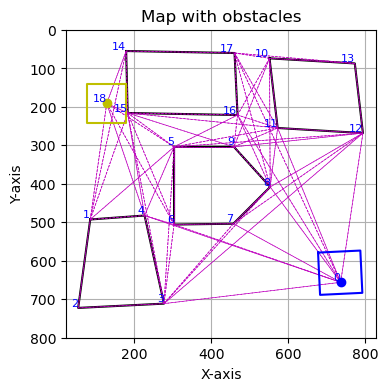

Weighted graph :


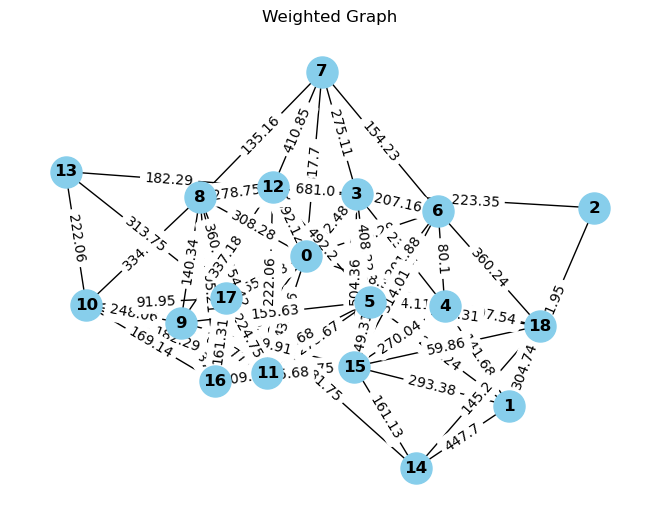

Path nodes : [0, 8, 9, 15, 18]
Coordinates of points of the path :
[[736, 656], [552.7844933031522, 408.06832043923356], [458.6274414771788, 304.0], [182.41967922109424, 215.93844659404948], [128, 191]]
Lengths to go forward and angles to rotate :
[308.28240239106293, 140.34160369470644, 289.9061315646546, 59.86173740421384] 
 [33.733503582121045, 5.6740911917672605, 30.178896239522146, -6.936656864180264]

INIT STATE:  [[736.  ]
 [656.  ]
 [-92.73]]
x_init :  [[736.  ]
 [656.  ]
 [-92.73]]
expanded_obs :  [[(85.12079012240167, 492.70880621223074), (53.780729600870565, 722.5359167034588), (276.8516765722352, 711.3823693548907), (226.42678999289905, 482.36934280707237)], [(303.0, 304.0), (303.0, 505.87586608377785), (457.21190277123446, 503.64091097115124), (552.7844933031522, 408.06832043923356), (458.6274414771788, 304.0)], [(551.1051944385478, 73.81840869174553), (572.2292401190437, 254.88165738170994), (793.8948055614522, 268.18159130825444), (772.7707598809563, 87.11834261829006)],

IndexError: list index out of range

In [4]:
await main()

In [ ]:
#unlock the robot:
await(node.unlock())